# PS1
### Collaborators : N/A

*****
## Question 1

In [1]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=['sepal_length','sepal_width','petal_length','petal_width','class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from IPython.display import Markdown, display
from sklearn import preprocessing

display(Markdown("### Scaling Independent Features "))
X = df.drop('class', axis=1)
X = preprocessing.scale(X)
X = pd.DataFrame(X, 
                columns=['sepal_length','sepal_width','petal_length','petal_width'])
X.head()

### Scaling Independent Features 

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [3]:
display(Markdown("### Correlation Coefficients "))
corr_X = X.corr()
corr_X

### Correlation Coefficients 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [4]:
display(Markdown("### Covariance "))
cov_X = X.cov()
cov_X

### Covariance 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.110103,0.877605,0.823443
sepal_width,-0.110103,1.006711,-0.423338,-0.358937
petal_length,0.877605,-0.423338,1.006711,0.969219
petal_width,0.823443,-0.358937,0.969219,1.006711


In [5]:
from sklearn.decomposition import PCA

display(Markdown("### Principal Component Analysis"))

pca = PCA(n_components=4)
pca.fit(X)
print("Components : \n{0}".format(pca.components_))

### Principal Component Analysis

Components : 
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [6]:
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca,
                     columns=['pca_sepal_length','pca_sepal_width','pca_petal_length','pca_petal_width'])

In [7]:
X_pca

,pca_sepal_length,pca_sepal_width,pca_petal_length,pca_petal_width
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397
...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890
146,1.558492,-0.905314,-0.025382,-0.221322
147,1.520845,0.266795,0.179277,-0.118903
148,1.376391,1.016362,0.931405,-0.024146


In [8]:
X = pd.concat([X, X_pca], axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width,pca_sepal_length,pca_sepal_width,pca_petal_length,pca_petal_width
0,-0.900681,1.032057,-1.341272,-1.312977,-2.264542,0.505704,-0.121943,-0.023073
1,-1.143017,-0.124958,-1.341272,-1.312977,-2.086426,-0.655405,-0.227251,-0.103208
2,-1.385353,0.337848,-1.398138,-1.312977,-2.367950,-0.318477,0.051480,-0.027825
3,-1.506521,0.106445,-1.284407,-1.312977,-2.304197,-0.575368,0.098860,0.066311
4,-1.021849,1.263460,-1.341272,-1.312977,-2.388777,0.674767,0.021428,0.037397


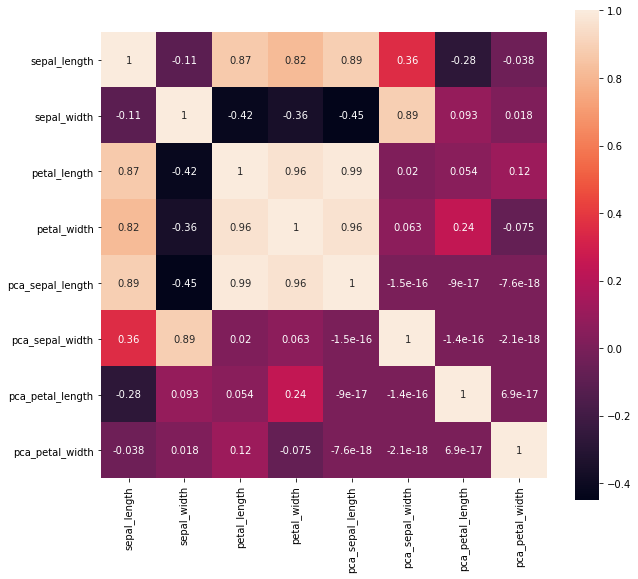

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10,9))
ax = sns.heatmap(X.corr(), annot=True, square=True)

****
## Question 2

1. Each of the new PCA feature generated has a somewhat high correlation with old features when compared to the correlation they have with other PCA features. The new features generated by the PCA is a matrix multiplication of the old data and the eigenvectors, ie. principal components.

2. Linear Combinations. Each new attribute is a linear combination of the original attribute, ie. principal components are linear combinations of the original data.

****
## Question 3

My implementation of decision tree relies on the Node class doing most of the work. The decision tree class initialises one node object, root, and calls the build_branch method on it. This method recursively builds a tree splitting on data using either gini index or gain ratio. It handles numerical, binary and multi-class data. The decision tree class also does the job of predicting. Predicting is as simple as traversing the root and checking for values in row.

In [10]:
import pandas as pd
import numpy as np
from collections import Counter
from operator import itemgetter
from math import log
from pprint import pprint
import itertools
import random
from sklearn.metrics import accuracy_score

class Node:
    """
        Class for nodes of the decision tree. Most of the work is done by them.
        They recursively build branches off of each other. 
    """
    def __init__(self, X, Y, eval_method):
        """
            X -> independent features
            Y -> dependent features
            eval_method -> g for gini index
                           gr for gain ratio
        """
        self.right = None
        self.left = None
        self.X = X
        self.Y = Y
        self.types = self.dtypes()
        self.eval_method = eval_method
        self.impurity_before = self.impurity_b()
        self.split_feature = None
        self.info = {}
        self.split_condition = None
        self.is_leaf = False
        
    def has_children(self): return True if self.left or self.right else False
    
    def print_info(self) : 
        return self.info
    
    def impurity_b(self): 
        """
            Calculates the entropy/gini before any split happens
        """
        if self.eval_method == 'g':
            gini = 1
            for label in self.Y.unique():
                gini += -1 * np.square(len(self.Y.loc[self.Y == label])/len(self.Y))
            return gini
        else :
            entropy = []
            for label in self.Y.unique() :
                en = len(self.Y.loc[self.Y == label])/len(self.Y) * log(len(self.Y.loc[self.Y == label])/len(self.Y), 2)
                entropy.append(en)
            return -1 * sum(entropy)
        
    def dtypes(self):
        """
            Returns the data types of features, n is numerical
                                                m is multiclass
                                                b is binary
            if numerical data doesn't have more than 6 unique values,
            it is classified as multiclass.
        """
        types = {}
        for f in self.X.columns :
            if self.X[f].dtype != "O" :
                if self.X[f].nunique() > 4 : types[f] = 'n'
                else : types[f] = 'm'
            else :
                if self.X[f].nunique() <= 2: types[f] = 'b'
                else : types[f] = 'm'
        return types

    def impurity_multi(self, f):
        """
            Calculates either gini index or gain ratio for feature 'f' depending on user input.
            This method is for binary or multiclass data.
        """
        values = []
        combos = []
        total = len(self.Y)
        for i in range(0, self.X[f].nunique()):
            combos = combos + list(itertools.combinations(self.X[f].unique(), i))
        for combo in combos :
            yes = Counter(self.Y.loc[self.X[f].isin(combo)])
            no = Counter(self.Y.loc[~self.X[f].isin(combo)])

            impurity = None
            if self.eval_method == 'g' :    
                gini_yes = 1 - sum( [(yes[k]/sum(yes.values()))**2 for k in yes.keys()] )
                gini_no = 1 - sum( [(no[k]/sum(no.values()))**2 for k in no.keys()] )
                impurity = (sum(yes.values())/total * gini_yes) + (sum(no.values())/total *gini_no)
            else :
                entropy_yes = -1 * sum([(yes[k]/sum(yes.values())) * log(yes[k]/sum(yes.values()), 2) for k in yes.keys()])
                entropy_no = -1 * sum([(no[k]/sum(no.values())) * log(no[k]/sum(no.values()), 2) for k in no.keys()])
                entropy = (sum(yes.values())/total * entropy_yes) + (sum(no.values())/total * entropy_no)
                info_gain = self.impurity_before - entropy
                split_info = sum([-1 * v/(sum(yes.values()) + sum(no.values())) * 
                                  log(v/(sum(yes.values()) + sum(no.values())),2) for v in yes.values()])
                split_info += sum([-1 * v/(sum(yes.values()) + sum(no.values())) * 
                                  log(v/(sum(yes.values()) + sum(no.values())),2) for v in no.values()])
                impurity = info_gain / split_info

            values.append(impurity)
        return values, combos
    
    def impurity_numerical(self, f):
        """
            Calculates either gini index or gain ratio for feature 'f' depending on user input.
            This method is for numerical data.
        """
        values = []
        combos = []
        total = len(self.Y)
        sorted_vals = self.X[f].unique()
        sorted_vals.sort()
        for i in range(len(sorted_vals)-1):
            avg = (sorted_vals[i] + sorted_vals[i+1]) / 2
            yes = Counter(self.Y.loc[self.X[f] <= avg])
            no = Counter(self.Y.loc[self.X[f] > avg])
            impurity = None
            if self.eval_method == 'g' :
                gini_yes = 1 - sum( [(yes[k]/sum(yes.values()))**2 for k in yes.keys()] )
                gini_no = 1 - sum( [(no[k]/sum(no.values()))**2 for k in no.keys()] )
                impurity = (sum(yes.values())/total * gini_yes) + (sum(no.values())/total *gini_no)
            else :
                entropy_yes = -1 * sum([(yes[k]/sum(yes.values())) * log(yes[k]/sum(yes.values()), 2) for k in yes.keys()])
                entropy_no = -1 * sum([(no[k]/sum(no.values())) * log(no[k]/sum(no.values()), 2) for k in no.keys()])
                entropy = (sum(yes.values())/total * entropy_yes) + (sum(no.values())/total * entropy_no)
                info_gain = self.impurity_before - entropy
                split_info = sum([-1 * v/(sum(yes.values()) + sum(no.values())) * 
                                  log(v/(sum(yes.values()) + sum(no.values())),2) for v in yes.values()])
                split_info += sum([-1 * v/(sum(yes.values()) + sum(no.values())) * 
                                  log(v/(sum(yes.values()) + sum(no.values())),2) for v in no.values()])
                impurity = info_gain / split_info
            values.append(impurity)
            combos.append(avg)
        return values, combos
    
    def best_split(self):
        """
            Calculates the best feature to split on for a node depending on the 
            impurity technique selected by user.
        """
        impurity_vals = []
        for f in self.X.columns :
            impurity, combos = None, None
            if self.types[f] == 'n': # numerical
                impurity, combos = self.impurity_numerical(f)    
            else: # binary/multi
                impurity, combos = self.impurity_multi(f)
            best, val = None, None
            if self.eval_method == 'g':  #gini
                best = combos[np.argmin(impurity)]
                val = np.min(impurity)
            else: #gain ratio (gr)
                best = combos[np.argmax(impurity)]
                val = np.max(impurity)
            impurity_vals.append((f, best, val))
            return impurity_vals
    
    def __impurity_check(self, vals):
        if self.eval_method == 'g' : return self.impurity_b() < np.min(vals)
        else : return self.impurity_b() < np.max(vals)
    
    def __get_split_combo(self, impurities, vals):
        """
            Gets the combination for multiclass data
        """
        split_f, best_combo = None, None
        if self.eval_method == 'g': 
            split_f = impurities[np.argmin(vals)][0]
            best_combo = impurities[np.argmin(vals)][1]
        else:
            split_f = impurities[np.argmax(vals)][0]
            best_combo = impurities[np.argmax(vals)][1]
        return split_f, best_combo
    
    def build_branch(self, depth=0) :
        """
            Most of the hardwork is done here. This method is recursively called on the 
            root's left and right children. Data is split at nodes with the best feature 
            decided by the best_split method. 
        """
        if len(self.Y.unique()) == 1:
            self.left = None
            self.right = None
            self.is_leaf = True
            return self
        
        impurity_values = self.best_split()
        vals = [val[2] for val in impurity_values]
        split_f = None
        best_combo = None
        if self.__impurity_check(vals) or np.min(vals) <= 0:
            print("terminating")
            self.left = None
            self.right = None
            self.is_leaf = True
        else:

            split_f ,best_combo = self.__get_split_combo(impurity_values, vals)
            self.split_feature = split_f 
            self.split_condition = best_combo
            left_x, left_y, right_x, right_y = None, None, None, None
            if self.types[split_f] == 'm': # multiclass
                left_x = self.X.loc[self.X[split_f].isin(best_combo)]
                left_x.drop([split_f], axis=1, inplace=True)
                left_y = self.Y.loc[self.X[split_f].isin(best_combo)]

                right_x = self.X.loc[~self.X[split_f].isin(best_combo)]
                right_y = self.Y.loc[~self.X[split_f].isin(best_combo)]
                right_x.drop([split_f], axis=1, inplace=True)
            else: # numerical
                left_x = self.X.loc[self.X[split_f] <= best_combo]
                left_x.drop([split_f], axis=1, inplace=True)
                left_y = self.Y.loc[self.X[split_f] <= best_combo]    

                right_x = self.X.loc[self.X[split_f] > best_combo]
                right_y = self.Y.loc[self.X[split_f] > best_combo]
                right_x.drop([split_f], axis=1, inplace=True)

            if list(left_x.columns) == []:
                print("terminating")
                self.left = None
                self.is_leaf = True
            elif len(set(left_y)) == 1:
                print("terminating")
                self.left = None
                self.is_leaf = True
            else:
                self.info['split_col'] = self.split_feature
                self.left = Node(left_x, left_y, self.eval_method)
                self.left.build_branch()
                self.info['left_node'] = self.left.info  

            if list(right_x.columns) == []:
                print("terminating")
                self.right = None
                self.is_leaf = True
            elif len(set(right_y)) == 1:
                print("terminating")
                self.right = None
                self.is_leaf = True
            else:
                self.right = Node(right_x, right_y, self.eval_method)
                self.right.build_branch()
                self.info['right'] = self.right.info

In [11]:
class Decision_Tree :
    """
        This class relies on Node class for most of the work. This class 
        does the prediction and the traversal of the tree.
    """
    def __init__(self):
        self.root = None
    
    def fit(self, X, Y, eval_method):
        self.root = Node(X,Y,eval_method)
        self.root.build_branch()
    
    def predict(self, x):
        """
            Traverses the tree accroding to the data provided and returns 
            a class label for each row provided.
        """
        node = self.root
        results = list()
        for i, row in x.iterrows() : 
            while not node.is_leaf :
                val = row[node.split_feature]
                if node.has_children():
                    if node.types[node.split_feature] == 'n':
                        if val <= node.split_condition : node = node.left
                        else : node = node.right
                    else :
                        if val in node.split_condition : node = node.left
                        else : node = node.right
            if(node.Y.nunique() > 1) : 
                rnd = random.randint(0,1)
                results.append(node.Y.unique()[rnd])
            else : results.append(node.Y.unique())
        return results                
    
    def traverse(self, node):
        """
            Traverse the tree starting at a node, ie. tree.root and print certain 
            attributes.
        """
        
        if node is None:
            return
        print("Split_col : {0}, Split_feature : {1}".format(node.split_feature, 
                                                            node.split_condition))                
        if node.left is not None:
            print("+++++++++++++++++ LEFT NODE ++++++++++++++++")
            print("Left node columns : {0}".format(node.left.X.columns))
            print("Left node Y unique : {0}".format(node.left.Y.unique()))
        if node.right is not None:
            print("+++++++++++++++++ RIGHT NODE ++++++++++++++++")
            print("Right node columns : {0}".format(node.right.X.columns))
            print("Right node Y unique : {0}".format(node.right.Y.unique()))
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        if node.left is not None:
            self.traverse(node.left)
        if node.right is not None:
            self.traverse(node.right)

In [12]:
toy = pd.DataFrame({'color':['Green','Yellow','Blue','Blue','Yellow'],
                    'diameter':[3,3,1,1,3],
                    'label':['Apple','Apple','Banana','Banana','Lemon']})
toy.head()

,color,diameter,label
0,Green,3,Apple
1,Yellow,3,Apple
2,Blue,1,Banana
3,Blue,1,Banana
4,Yellow,3,Lemon


In [13]:
X = toy.drop('label',axis=1)
Y = toy['label']
X.head()

,color,diameter
0,Green,3
1,Yellow,3
2,Blue,1
3,Blue,1
4,Yellow,3


In [14]:
toy_test = pd.DataFrame({'color':['Yellow','Green','Yellow','Blue'],
                         'diameter':['3','3','1','1'],
                         'label':['Apple','Banana','Lemon','Banana']})
toy_test.head()

,color,diameter,label
0,Yellow,3,Apple
1,Green,3,Banana
2,Yellow,1,Lemon
3,Blue,1,Banana


In [15]:
x_t = toy_test.drop('label', axis=1)
y_t = toy_test['label']

In [16]:
tree = Decision_Tree()
tree.fit(X,Y,'g')

terminating
terminating
terminating


/home/rohit/anaconda3/envs/A3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
y_pred = tree.predict(x_t)
accuracy_score(y_t, y_pred)

0.75

In [18]:
y_pred

['Apple', 'Banana', 'Banana', 'Banana']